<h1><center>19CSE305 Machine Learning</center></h1>

<h2><center>Title: Predict Ads Click</center>
    <h3><center>We have to predict whether a user clicks on the advertaisment or not based on his features.</center></h3>

# <font color ='Green'>Data Gathering -> EDA -> Choosing a Model</font>

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(style='dark')
import warnings
warnings.filterwarnings('ignore')

In [82]:
from datetime import datetime

## Step 1 : Data Gathering

## Reading the CSV file

In [83]:
missingvalues=['--','NaN','na','-','NA','n/a']

In [84]:
s=pd.read_csv('advertising.csv',na_values=missingvalues)

In [85]:
s

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
5                       59.99   23     59761.56                226.74   
6                       88.91   33     53852.85                208.36   
7                       66.00   48     24593.33                131.76   
8                       74.53   30     68862.00                221.51   
9                       69.88   20     55642.32                183.82   
10                      47.64   49     45632.51                122.02   
11                      83.07   37     62491.01                230.87   
12                      69.57   48     51636.92                113.12   
13                      79.52   24     51739.63                214.23   
14                      42.95   33     30976.00                143.56   
15                      63.45   23     52182.23                140.64   
16                      55.39   37     23936.86                129.41   
17                      82.03   41     71511.08                187.53   
18                      54.70   36     31087.54                118.39   
19                      74.58   40     23821.72                135.51   
20                      77.22   30     64802.33                224.44   
21                      84.59   35     60015.57                226.54   
22                      41.49   52     32635.70                164.83   
23                      87.29   36     61628.72                209.93   
24                      41.39   41     68962.32                167.22   
25                      78.74   28     64828.00                204.79   
26                      48.53   28     38067.08                134.14   
27                      51.95   52     58295.82                129.23   
28                      70.20   34     32708.94                119.20   
29                      76.02   22     46179.97                209.82   
30                      67.64   35     51473.28                267.01   
31                      86.41   28     45593.93                207.48   
32                      59.05   57     25583.29                169.23   
33                      55.60   23     30227.98                212.58   
34                      57.64   57     45580.92                133.81   
35                      84.37   30     61389.50                201.58   
36                      62.26   53     56770.79                125.45   
37                      65.82   39     76435.30                221.94   
38                      50.43   46     57425.87                119.32   
39                      38.93   39     27508.41                162.08   
40                      84.98   29     57691.95                202.61   
41                      64.24   30     59784.18                252.36   
42                      82.52   32     66572.39                198.11   
43                      81.38   31     64929.61                212.30   
44                      80.47   25     57519.64                204.86   
45                      37.68   52     53575.48                172.83   
46                      69.62   20     50983.75                202.25   
47                      85.40   43     67058.72                198.72   
48                      44.33   37     52723.34                123.72   
49                      48.01   46     54286.10                119.93   
50                      73.18   23     61526.25                196.71   
51                      79.94   28     58526.04                225.29   
52                      33.33   45     53350.11                193.58   
53                      50.33   50     62657.53                

In [86]:
a=list(s.describe().columns)####
a

['Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage',
 'Male',
 'Clicked on Ad']

## Checking for missing data

In [87]:
s.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

### Total null values :

In [88]:
s.isnull().sum().sum()

0

# Na values

In [89]:
s.isna().sum().sum()

0

## Checking for Duplicated rows

In [90]:
s.duplicated().sum()

0

## Droping the duplicated row

In [91]:
y=s[s.duplicated()]
y=y.index

In [92]:
s.drop(y)

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
5                       59.99   23     59761.56                226.74   
6                       88.91   33     53852.85                208.36   
7                       66.00   48     24593.33                131.76   
8                       74.53   30     68862.00                221.51   
9                       69.88   20     55642.32                183.82   
10                      47.64   49     45632.51                122.02   
11                      83.07   37     62491.01                230.87   
12                      69.57   48     51636.92                113.12   
13                      79.52   24     51739.63                214.23   
14                      42.95   33     30976.00                143.56   
15                      63.45   23     52182.23                140.64   
16                      55.39   37     23936.86                129.41   
17                      82.03   41     71511.08                187.53   
18                      54.70   36     31087.54                118.39   
19                      74.58   40     23821.72                135.51   
20                      77.22   30     64802.33                224.44   
21                      84.59   35     60015.57                226.54   
22                      41.49   52     32635.70                164.83   
23                      87.29   36     61628.72                209.93   
24                      41.39   41     68962.32                167.22   
25                      78.74   28     64828.00                204.79   
26                      48.53   28     38067.08                134.14   
27                      51.95   52     58295.82                129.23   
28                      70.20   34     32708.94                119.20   
29                      76.02   22     46179.97                209.82   
30                      67.64   35     51473.28                267.01   
31                      86.41   28     45593.93                207.48   
32                      59.05   57     25583.29                169.23   
33                      55.60   23     30227.98                212.58   
34                      57.64   57     45580.92                133.81   
35                      84.37   30     61389.50                201.58   
36                      62.26   53     56770.79                125.45   
37                      65.82   39     76435.30                221.94   
38                      50.43   46     57425.87                119.32   
39                      38.93   39     27508.41                162.08   
40                      84.98   29     57691.95                202.61   
41                      64.24   30     59784.18                252.36   
42                      82.52   32     66572.39                198.11   
43                      81.38   31     64929.61                212.30   
44                      80.47   25     57519.64                204.86   
45                      37.68   52     53575.48                172.83   
46                      69.62   20     50983.75                202.25   
47                      85.40   43     67058.72                198.72   
48                      44.33   37     52723.34                123.72   
49                      48.01   46     54286.10                119.93   
50                      73.18   23     61526.25                196.71   
51                      79.94   28     58526.04                225.29   
52                      33.33   45     53350.11                193.58   
53                      50.33   50     62657.53                

### Checking for null values

In [93]:
s.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

#### We can see the quality of our data by finding the number of null values(missing values") in the dataset.

<AxesSubplot:>

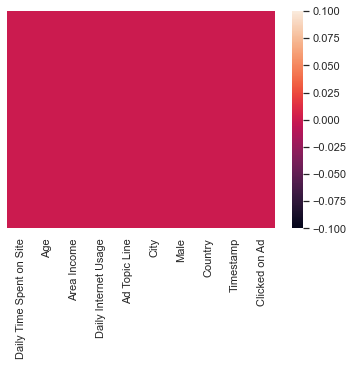

In [94]:
sns.heatmap(s.isnull(), yticklabels=False) 

### Data Types

In [95]:
s.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

#### Strings are referred to as object in s.dtypes

### Country analysis

In [96]:
pd.set_option('display.max_rows', None)
s.groupby(['Country'])['Clicked on Ad'].count().sort_values(ascending=False) 

Country
France                                                 9
Czech Republic                                         9
Afghanistan                                            8
Australia                                              8
Turkey                                                 8
South Africa                                           8
Senegal                                                8
Peru                                                   8
Micronesia                                             8
Greece                                                 8
Cyprus                                                 8
Liberia                                                8
Albania                                                7
Bosnia and Herzegovina                                 7
Taiwan                                                 7
Bahamas                                                7
Burundi                                                7
Cambodia               

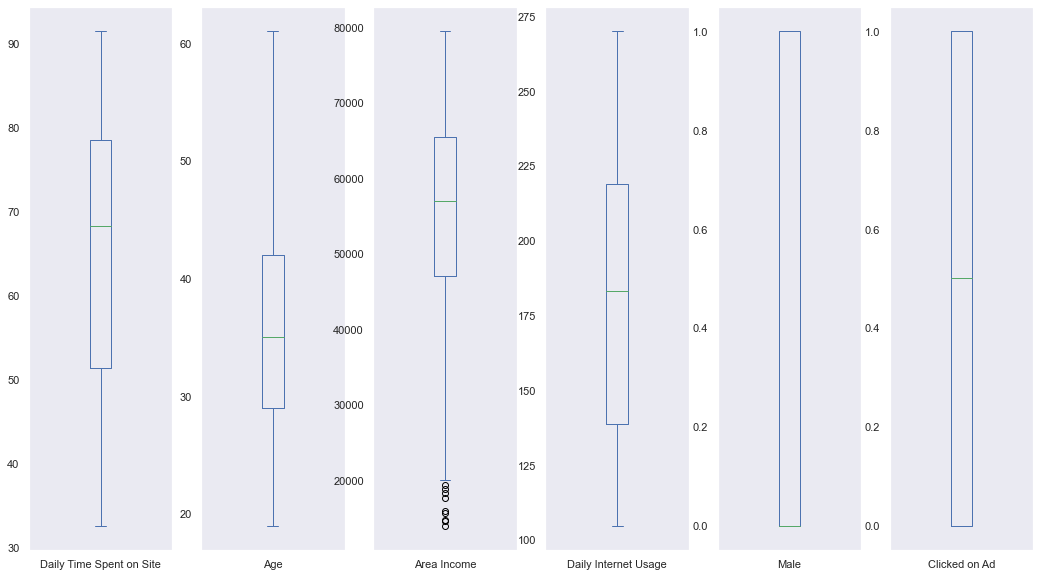

In [97]:
cols_plot = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male', 'Clicked on Ad']
axes = s[cols_plot].plot(kind = 'box', figsize=(18, 10),subplots=True)#####

In [98]:
# Removing the outliers####
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1

    print("IQR value for column %s is: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data

    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if ((x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]


for i in a:
    if i == a[0]:
        removeOutliers(s, i)
    else:
        removeOutliers(filtered_data, i)


# Assigning filtered data back to our original variable
data = filtered_data
print("Shape of data after outlier removal is: ", data.shape)
s=data.reset_index(drop=True)
s=pd.DataFrame(s)

IQR value for column Daily Time Spent on Site is: 27.1875
IQR value for column Age is: 13.0
IQR value for column Area Income is: 18438.832499999997
IQR value for column Daily Internet Usage is: 80.26999999999998
IQR value for column Male is: 1.0
IQR value for column Clicked on Ad is: 1.0
Shape of data after outlier removal is:  (991, 10)


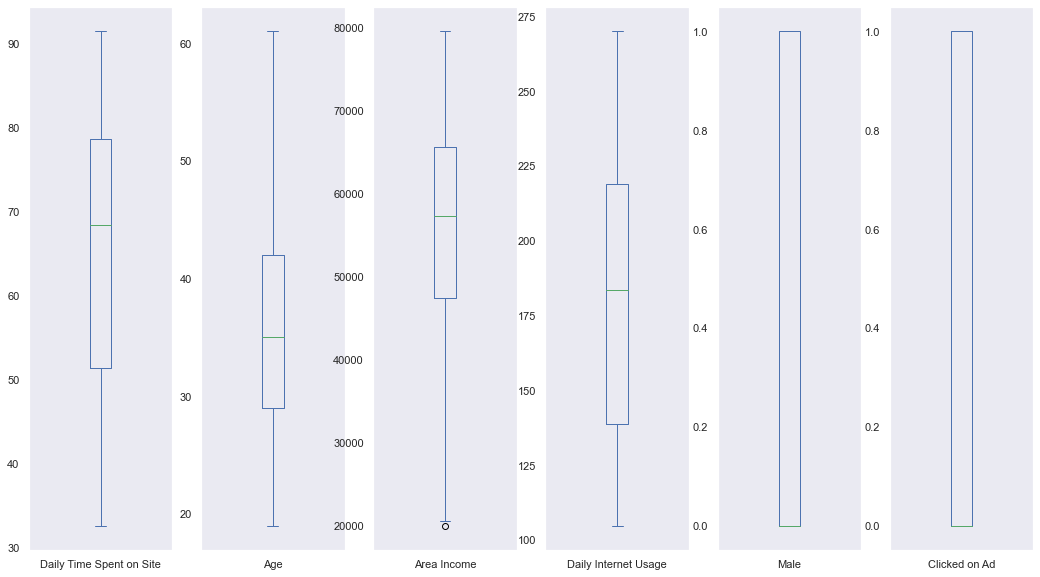

In [99]:
cols_plot = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male', 'Clicked on Ad']
axes = s[cols_plot].plot(kind = 'box', figsize=(18, 10),subplots=True)######

#### From the analysis above we can find that France and Czech Republic

## What age group does the dataset majorly consist of?

<AxesSubplot:xlabel='Age', ylabel='Density'>

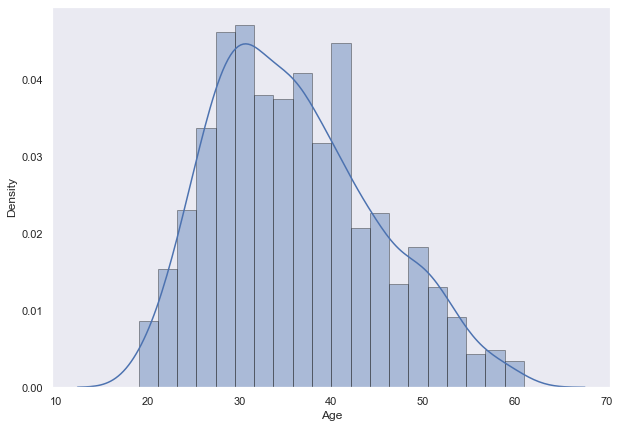

In [162]:
plt.figure(figsize=(10,7))
sns.distplot(s['Age'], bins = 20, kde=True, hist_kws=dict(edgecolor="k", linewidth=1))

Here, we can see that most of the internet users are having age in the range of 26 to 42 years.

### Age vs Daily Time spent on the Internet

<AxesSubplot:xlabel='Age', ylabel='Daily Time Spent on Site'>

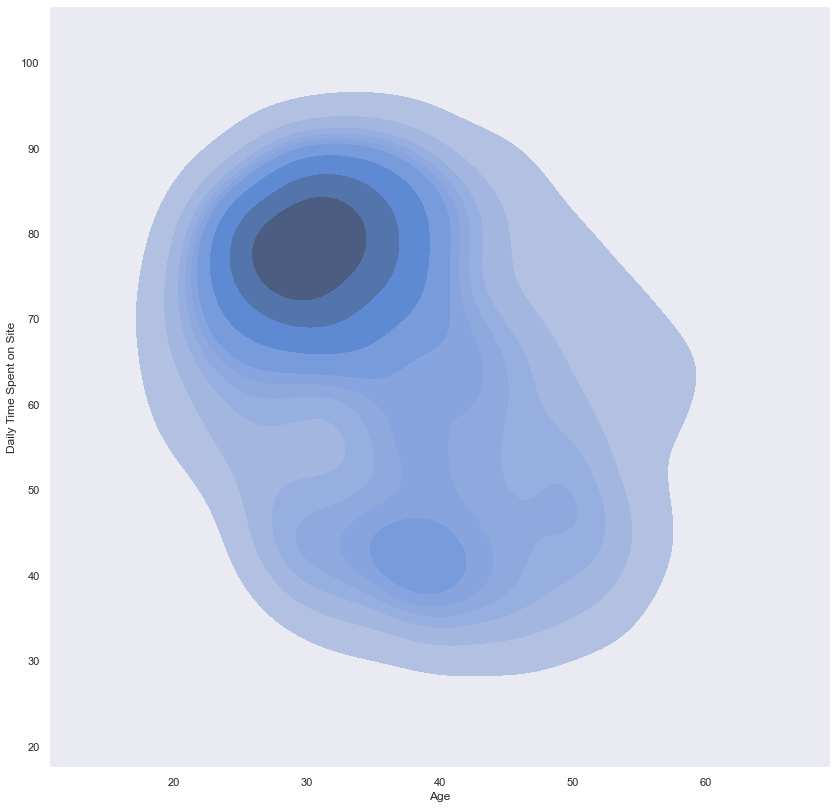

In [101]:
fmale=s['Daily Time Spent on Site']
male1=s['Age']
figure=plt.figure(figsize=(14,14))
sns.kdeplot(male1,fmale, color='b', shade=True, Label='Iris_Setosa')


#### We can see that people of age 25 to 35 spend most of the time in the Internet compared to the other age groups

## What is the income distribution in different age groups? 

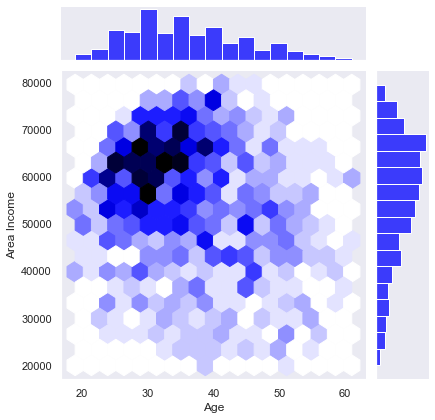

In [102]:
sns.jointplot(x='Age', y='Area Income', color= "blue", data= s,kind='hex')

#### Here, we can see that mostly teenagers are higher earners with age group of 25-35 earning 55k-75k.

# Which age group is spending maximum time on the internet?


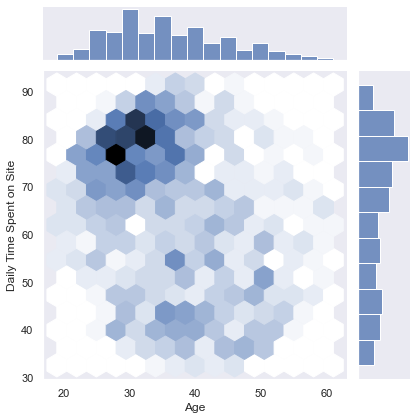

In [103]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data= s,kind='hex')

From the above plot its evident that the age group of 25-40 is most active on the internet.


<AxesSubplot:xlabel='Daily Internet Usage', ylabel='Density'>

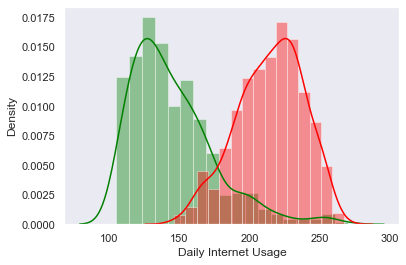

In [104]:
sns.distplot(s['Daily Internet Usage'][s['Clicked on Ad']==1], color='green')
sns.distplot(s['Daily Internet Usage'][s['Clicked on Ad']==0], color='red')

People using internet<175 per day clicks on the adverstisement.
People using internet>175 per day do not click on the adverstisement.

<AxesSubplot:xlabel='Male', ylabel='count'>

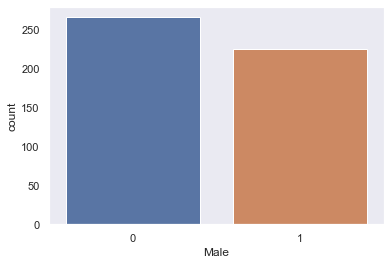

In [105]:
sns.countplot(s['Male'][s['Clicked on Ad']==1])

It is observed that more females than males have clicked on the advertisement.

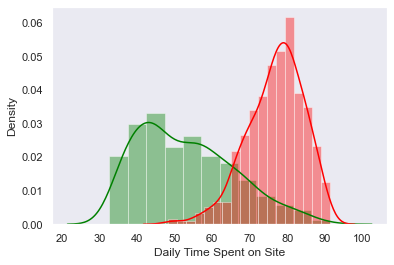

In [106]:
sns.distplot(s['Daily Time Spent on Site'][s['Clicked on Ad']==1], color='green')
sns.distplot(s['Daily Time Spent on Site'][s['Clicked on Ad']==0], color='red')
plt.show()

It is observed that people who have spent more than 60 hours on Site have not clicked on the advertisement.

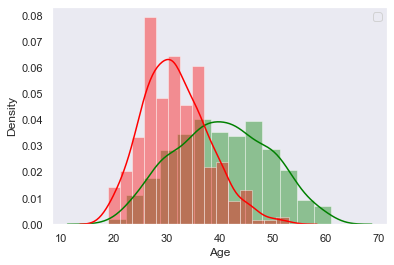

In [107]:
sns.distplot(s['Age'][s['Clicked on Ad']==1], color='green')
sns.distplot(s['Age'][s['Clicked on Ad']==0], color='red')
plt.legend("0", "1")
plt.show()

It is observed that:
Age < 35, majority of people have not clicked on the advertisement.
Age > 35, majority of people have clicked on the advertisement.

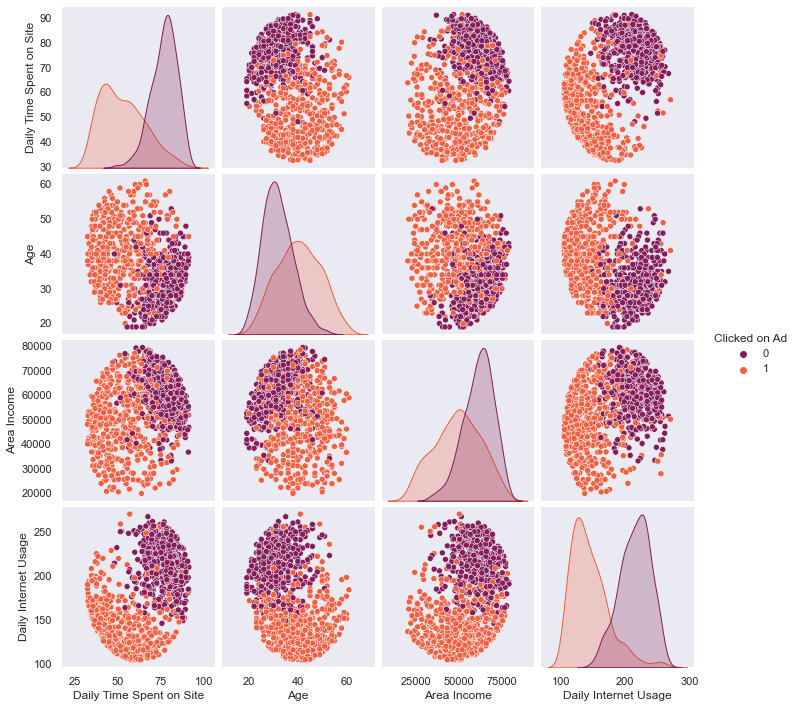

In [108]:
# Creating a pairplot with hue defined by Clicked on Ad column
sns.pairplot(s, hue = 'Clicked on Ad', vars = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'],palette = 'rocket')

# Encoding Catergorical DATA

In [109]:
s['Ad Topic Line'].nunique()

991

In [110]:
s['City'].nunique()

960

In [111]:
s['Country'].nunique()

237

In [112]:
r=pd.read_csv('advertising.csv',index_col='Timestamp',parse_dates=True)

In [113]:
r

Daily Time Spent on Site  Age  Area Income  \
Timestamp                                                         
2016-03-27 00:53:11                     68.95   35     61833.90   
2016-04-04 01:39:02                     80.23   31     68441.85   
2016-03-13 20:35:42                     69.47   26     59785.94   
2016-01-10 02:31:19                     74.15   29     54806.18   
2016-06-03 03:36:18                     68.37   35     73889.99   
2016-05-19 14:30:17                     59.99   23     59761.56   
2016-01-28 20:59:32                     88.91   33     53852.85   
2016-03-07 01:40:15                     66.00   48     24593.33   
2016-04-18 09:33:42                     74.53   30     68862.00   
2016-07-11 01:42:51                     69.88   20     55642.32   
2016-03-16 20:19:01                     47.64   49     45632.51   
2016-05-08 08:10:10                     83.07   37     62491.01   
2016-06-03 01:14:41                     69.57   48     51636.92   
2016-04-20 21:49:22                     79.52   24     51739.63   
2016-03-24 09:31:49                     42.95   33     30976.00   
2016-03-09 03:41:30                     63.45   23     52182.23   
2016-01-30 19:20:41                     55.39   37     23936.86   
2016-05-02 07:00:58                     82.03   41     71511.08   
2016-02-13 07:53:55                     54.70   36     31087.54   
2016-02-27 04:43:07                     74.58   40     23821.72   
2016-01-05 07:52:48                     77.22   30     64802.33   
2016-03-18 13:22:35                     84.59   35     60015.57   
2016-05-20 08:49:33                     41.49   52     32635.70   
2016-03-23 09:43:43                     87.29   36     61628.72   
2016-06-13 17:27:09                     41.39   41     68962.32   
2016-05-27 15:25:52                     78.74   28     64828.00   
2016-02-08 10:46:14                     48.53   28     38067.08   
2016-07-19 08:32:10                     51.95   52     58295.82   
2016-04-14 05:08:35                     70.20   34     32708.94   
2016-01-27 12:38:16                     76.02   22     46179.97   
2016-07-02 20:23:15                     67.64   35     51473.28   
2016-03-01 22:13:37                     86.41   28     45593.93   
2016-07-15 05:05:14                     59.05   57     25583.29   
2016-01-14 14:00:09                     55.60   23     30227.98   
2016-03-15 03:12:25                     57.64   57     45580.92   
2016-04-12 03:26:39                     84.37   30     61389.50   
2016-04-07 15:18:10                     62.26   53     56770.79   
2016-02-09 05:28:18                     65.82   39     76435.30   
2016-05-07 17:11:49                     50.43   46     57425.87   
2016-03-11 06:49:10                     38.93   39     27508.41   
2016-04-27 09:27:58                     84.98   29     57691.95   
2016-04-16 11:53:43                     64.24   30     59784.18   
2016-05-08 15:38:46                     82.52   32     66572.39   
2016-02-08 00:23:38                     81.38   31     64929.61   
2016-02-11 13:26:22                     80.47   25     57519.64   
2016-02-17 13:16:33                     37.68   52     53575.48   
2016-02-26 22:46:43                     69.62   20     50983.75   
2016-06-08 18:54:01                     85.40   43     67058.72   
2016-01-08 09:32:26                     44.33   37     52723.34   
2016-04-25 11:01:54                     48.01   46     54286.10   
2016-04-04 07:07:46                     73.18   23     61526.25   
2016-05-03 21:19:58                     79.94   28     58526.04   
2016-01-17 09:31:36                     33.33   45     53350.11   
2016-03-02 04:57:51                     50.33   50     62657.53   
2016-02-14 07:36:58                     62.31   47     62722.57   
2016-04-07 03:56:16                     80.60   31     67479.62   
2016-02-17 11:42:00                     65.19   36     75254.88   
2016-04-10 00:13:47                     44.98   49     52336.64   
2

In [114]:
r['hour']=r.index.hour
r['month']=r.index.month
r['year']=r.index.year

In [115]:
r

Daily Time Spent on Site  Age  Area Income  \
Timestamp                                                         
2016-03-27 00:53:11                     68.95   35     61833.90   
2016-04-04 01:39:02                     80.23   31     68441.85   
2016-03-13 20:35:42                     69.47   26     59785.94   
2016-01-10 02:31:19                     74.15   29     54806.18   
2016-06-03 03:36:18                     68.37   35     73889.99   
2016-05-19 14:30:17                     59.99   23     59761.56   
2016-01-28 20:59:32                     88.91   33     53852.85   
2016-03-07 01:40:15                     66.00   48     24593.33   
2016-04-18 09:33:42                     74.53   30     68862.00   
2016-07-11 01:42:51                     69.88   20     55642.32   
2016-03-16 20:19:01                     47.64   49     45632.51   
2016-05-08 08:10:10                     83.07   37     62491.01   
2016-06-03 01:14:41                     69.57   48     51636.92   
2016-04-20 21:49:22                     79.52   24     51739.63   
2016-03-24 09:31:49                     42.95   33     30976.00   
2016-03-09 03:41:30                     63.45   23     52182.23   
2016-01-30 19:20:41                     55.39   37     23936.86   
2016-05-02 07:00:58                     82.03   41     71511.08   
2016-02-13 07:53:55                     54.70   36     31087.54   
2016-02-27 04:43:07                     74.58   40     23821.72   
2016-01-05 07:52:48                     77.22   30     64802.33   
2016-03-18 13:22:35                     84.59   35     60015.57   
2016-05-20 08:49:33                     41.49   52     32635.70   
2016-03-23 09:43:43                     87.29   36     61628.72   
2016-06-13 17:27:09                     41.39   41     68962.32   
2016-05-27 15:25:52                     78.74   28     64828.00   
2016-02-08 10:46:14                     48.53   28     38067.08   
2016-07-19 08:32:10                     51.95   52     58295.82   
2016-04-14 05:08:35                     70.20   34     32708.94   
2016-01-27 12:38:16                     76.02   22     46179.97   
2016-07-02 20:23:15                     67.64   35     51473.28   
2016-03-01 22:13:37                     86.41   28     45593.93   
2016-07-15 05:05:14                     59.05   57     25583.29   
2016-01-14 14:00:09                     55.60   23     30227.98   
2016-03-15 03:12:25                     57.64   57     45580.92   
2016-04-12 03:26:39                     84.37   30     61389.50   
2016-04-07 15:18:10                     62.26   53     56770.79   
2016-02-09 05:28:18                     65.82   39     76435.30   
2016-05-07 17:11:49                     50.43   46     57425.87   
2016-03-11 06:49:10                     38.93   39     27508.41   
2016-04-27 09:27:58                     84.98   29     57691.95   
2016-04-16 11:53:43                     64.24   30     59784.18   
2016-05-08 15:38:46                     82.52   32     66572.39   
2016-02-08 00:23:38                     81.38   31     64929.61   
2016-02-11 13:26:22                     80.47   25     57519.64   
2016-02-17 13:16:33                     37.68   52     53575.48   
2016-02-26 22:46:43                     69.62   20     50983.75   
2016-06-08 18:54:01                     85.40   43     67058.72   
2016-01-08 09:32:26                     44.33   37     52723.34   
2016-04-25 11:01:54                     48.01   46     54286.10   
2016-04-04 07:07:46                     73.18   23     61526.25   
2016-05-03 21:19:58                     79.94   28     58526.04   
2016-01-17 09:31:36                     33.33   45     53350.11   
2016-03-02 04:57:51                     50.33   50     62657.53   
2016-02-14 07:36:58                     62.31   47     62722.57   
2016-04-07 03:56:16                     80.60   31     67479.62   
2016-02-17 11:42:00                     65.19   36     75254.88   
2016-04-10 00:13:47                     44.98   49     52336.64   
2

In [116]:
r.reset_index(inplace = True)

In [117]:
r

Timestamp  Daily Time Spent on Site  Age  Area Income  \
0   2016-03-27 00:53:11                     68.95   35     61833.90   
1   2016-04-04 01:39:02                     80.23   31     68441.85   
2   2016-03-13 20:35:42                     69.47   26     59785.94   
3   2016-01-10 02:31:19                     74.15   29     54806.18   
4   2016-06-03 03:36:18                     68.37   35     73889.99   
5   2016-05-19 14:30:17                     59.99   23     59761.56   
6   2016-01-28 20:59:32                     88.91   33     53852.85   
7   2016-03-07 01:40:15                     66.00   48     24593.33   
8   2016-04-18 09:33:42                     74.53   30     68862.00   
9   2016-07-11 01:42:51                     69.88   20     55642.32   
10  2016-03-16 20:19:01                     47.64   49     45632.51   
11  2016-05-08 08:10:10                     83.07   37     62491.01   
12  2016-06-03 01:14:41                     69.57   48     51636.92   
13  2016-04-20 21:49:22                     79.52   24     51739.63   
14  2016-03-24 09:31:49                     42.95   33     30976.00   
15  2016-03-09 03:41:30                     63.45   23     52182.23   
16  2016-01-30 19:20:41                     55.39   37     23936.86   
17  2016-05-02 07:00:58                     82.03   41     71511.08   
18  2016-02-13 07:53:55                     54.70   36     31087.54   
19  2016-02-27 04:43:07                     74.58   40     23821.72   
20  2016-01-05 07:52:48                     77.22   30     64802.33   
21  2016-03-18 13:22:35                     84.59   35     60015.57   
22  2016-05-20 08:49:33                     41.49   52     32635.70   
23  2016-03-23 09:43:43                     87.29   36     61628.72   
24  2016-06-13 17:27:09                     41.39   41     68962.32   
25  2016-05-27 15:25:52                     78.74   28     64828.00   
26  2016-02-08 10:46:14                     48.53   28     38067.08   
27  2016-07-19 08:32:10                     51.95   52     58295.82   
28  2016-04-14 05:08:35                     70.20   34     32708.94   
29  2016-01-27 12:38:16                     76.02   22     46179.97   
30  2016-07-02 20:23:15                     67.64   35     51473.28   
31  2016-03-01 22:13:37                     86.41   28     45593.93   
32  2016-07-15 05:05:14                     59.05   57     25583.29   
33  2016-01-14 14:00:09                     55.60   23     30227.98   
34  2016-03-15 03:12:25                     57.64   57     45580.92   
35  2016-04-12 03:26:39                     84.37   30     61389.50   
36  2016-04-07 15:18:10                     62.26   53     56770.79   
37  2016-02-09 05:28:18                     65.82   39     76435.30   
38  2016-05-07 17:11:49                     50.43   46     57425.87   
39  2016-03-11 06:49:10                     38.93   39     27508.41   
40  2016-04-27 09:27:58                     84.98   29     57691.95   
41  2016-04-16 11:53:43                     64.24   30     59784.18   
42  2016-05-08 15:38:46                     82.52   32     66572.39   
43  2016-02-08 00:23:38                     81.38   31     64929.61   
44  2016-02-11 13:26:22                     80.47   25     57519.64   
45  2016-02-17 13:16:33                     37.68   52     53575.48   
46  2016-02-26 22:46:43                     69.62   20     50983.75   
47  2016-06-08 18:54:01                     85.40   43     67058.72   
48  2016-01-08 09:32:26                     44.33   37     52723.34   
49  2016-04-25 11:01:54                     48.01   46     54286.10   
50  2016-04-04 07:07:46                     73.18   23     61526.25   
51  2016-05-03 21:19:58                     79.94   28     58526.04   
52  2016-01-17 09:31:36                     33.33   45     53350.11   
53  2016-03-02 04:57:51                     50.33   50     62657.53   
54  2016-02-14 07:36:58                     62.31   47     62722.57   
55  2016-04-07 03:56:16               

In [118]:
r

Timestamp  Daily Time Spent on Site  Age  Area Income  \
0   2016-03-27 00:53:11                     68.95   35     61833.90   
1   2016-04-04 01:39:02                     80.23   31     68441.85   
2   2016-03-13 20:35:42                     69.47   26     59785.94   
3   2016-01-10 02:31:19                     74.15   29     54806.18   
4   2016-06-03 03:36:18                     68.37   35     73889.99   
5   2016-05-19 14:30:17                     59.99   23     59761.56   
6   2016-01-28 20:59:32                     88.91   33     53852.85   
7   2016-03-07 01:40:15                     66.00   48     24593.33   
8   2016-04-18 09:33:42                     74.53   30     68862.00   
9   2016-07-11 01:42:51                     69.88   20     55642.32   
10  2016-03-16 20:19:01                     47.64   49     45632.51   
11  2016-05-08 08:10:10                     83.07   37     62491.01   
12  2016-06-03 01:14:41                     69.57   48     51636.92   
13  2016-04-20 21:49:22                     79.52   24     51739.63   
14  2016-03-24 09:31:49                     42.95   33     30976.00   
15  2016-03-09 03:41:30                     63.45   23     52182.23   
16  2016-01-30 19:20:41                     55.39   37     23936.86   
17  2016-05-02 07:00:58                     82.03   41     71511.08   
18  2016-02-13 07:53:55                     54.70   36     31087.54   
19  2016-02-27 04:43:07                     74.58   40     23821.72   
20  2016-01-05 07:52:48                     77.22   30     64802.33   
21  2016-03-18 13:22:35                     84.59   35     60015.57   
22  2016-05-20 08:49:33                     41.49   52     32635.70   
23  2016-03-23 09:43:43                     87.29   36     61628.72   
24  2016-06-13 17:27:09                     41.39   41     68962.32   
25  2016-05-27 15:25:52                     78.74   28     64828.00   
26  2016-02-08 10:46:14                     48.53   28     38067.08   
27  2016-07-19 08:32:10                     51.95   52     58295.82   
28  2016-04-14 05:08:35                     70.20   34     32708.94   
29  2016-01-27 12:38:16                     76.02   22     46179.97   
30  2016-07-02 20:23:15                     67.64   35     51473.28   
31  2016-03-01 22:13:37                     86.41   28     45593.93   
32  2016-07-15 05:05:14                     59.05   57     25583.29   
33  2016-01-14 14:00:09                     55.60   23     30227.98   
34  2016-03-15 03:12:25                     57.64   57     45580.92   
35  2016-04-12 03:26:39                     84.37   30     61389.50   
36  2016-04-07 15:18:10                     62.26   53     56770.79   
37  2016-02-09 05:28:18                     65.82   39     76435.30   
38  2016-05-07 17:11:49                     50.43   46     57425.87   
39  2016-03-11 06:49:10                     38.93   39     27508.41   
40  2016-04-27 09:27:58                     84.98   29     57691.95   
41  2016-04-16 11:53:43                     64.24   30     59784.18   
42  2016-05-08 15:38:46                     82.52   32     66572.39   
43  2016-02-08 00:23:38                     81.38   31     64929.61   
44  2016-02-11 13:26:22                     80.47   25     57519.64   
45  2016-02-17 13:16:33                     37.68   52     53575.48   
46  2016-02-26 22:46:43                     69.62   20     50983.75   
47  2016-06-08 18:54:01                     85.40   43     67058.72   
48  2016-01-08 09:32:26                     44.33   37     52723.34   
49  2016-04-25 11:01:54                     48.01   46     54286.10   
50  2016-04-04 07:07:46                     73.18   23     61526.25   
51  2016-05-03 21:19:58                     79.94   28     58526.04   
52  2016-01-17 09:31:36                     33.33   45     53350.11   
53  2016-03-02 04:57:51                     50.33   50     62657.53   
54  2016-02-14 07:36:58                     62.31   47     62722.57   
55  2016-04-07 03:56:16               

In [119]:
ext0=r['hour']
ext1=r['month']
ext2=r['year']
s=s.join(ext0)
s=s.join(ext1)
s=s.join(ext2)

In [120]:
s.drop('Timestamp',axis=1,inplace=True)

In [121]:
s.drop_duplicates(inplace=True)

In [122]:
s

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
5                       59.99   23     59761.56                226.74   
6                       88.91   33     53852.85                208.36   
7                       66.00   48     24593.33                131.76   
8                       74.53   30     68862.00                221.51   
9                       69.88   20     55642.32                183.82   
10                      47.64   49     45632.51                122.02   
11                      83.07   37     62491.01                230.87   
12                      69.57   48     51636.92                113.12   
13                      79.52   24     51739.63                214.23   
14                      42.95   33     30976.00                143.56   
15                      63.45   23     52182.23                140.64   
16                      55.39   37     23936.86                129.41   
17                      82.03   41     71511.08                187.53   
18                      54.70   36     31087.54                118.39   
19                      74.58   40     23821.72                135.51   
20                      77.22   30     64802.33                224.44   
21                      84.59   35     60015.57                226.54   
22                      41.49   52     32635.70                164.83   
23                      87.29   36     61628.72                209.93   
24                      41.39   41     68962.32                167.22   
25                      78.74   28     64828.00                204.79   
26                      48.53   28     38067.08                134.14   
27                      51.95   52     58295.82                129.23   
28                      70.20   34     32708.94                119.20   
29                      76.02   22     46179.97                209.82   
30                      67.64   35     51473.28                267.01   
31                      86.41   28     45593.93                207.48   
32                      59.05   57     25583.29                169.23   
33                      55.60   23     30227.98                212.58   
34                      57.64   57     45580.92                133.81   
35                      84.37   30     61389.50                201.58   
36                      62.26   53     56770.79                125.45   
37                      65.82   39     76435.30                221.94   
38                      50.43   46     57425.87                119.32   
39                      38.93   39     27508.41                162.08   
40                      84.98   29     57691.95                202.61   
41                      64.24   30     59784.18                252.36   
42                      82.52   32     66572.39                198.11   
43                      81.38   31     64929.61                212.30   
44                      80.47   25     57519.64                204.86   
45                      37.68   52     53575.48                172.83   
46                      69.62   20     50983.75                202.25   
47                      85.40   43     67058.72                198.72   
48                      44.33   37     52723.34                123.72   
49                      48.01   46     54286.10                119.93   
50                      73.18   23     61526.25                196.71   
51                      79.94   28     58526.04                225.29   
52                      33.33   45     53350.11                193.58   
53                      50.33   50     62657.53                

In [123]:
a

['Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage',
 'Male',
 'Clicked on Ad']

<AxesSubplot:xlabel='hour'>

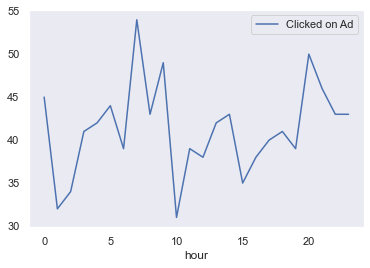

In [124]:
a=s.groupby("hour")["Clicked on Ad"].count()
a=pd.DataFrame(a)
sns.lineplot(data=a)


From here we find that at the 7th hour we notice there is a maximum amount of Ad clicks

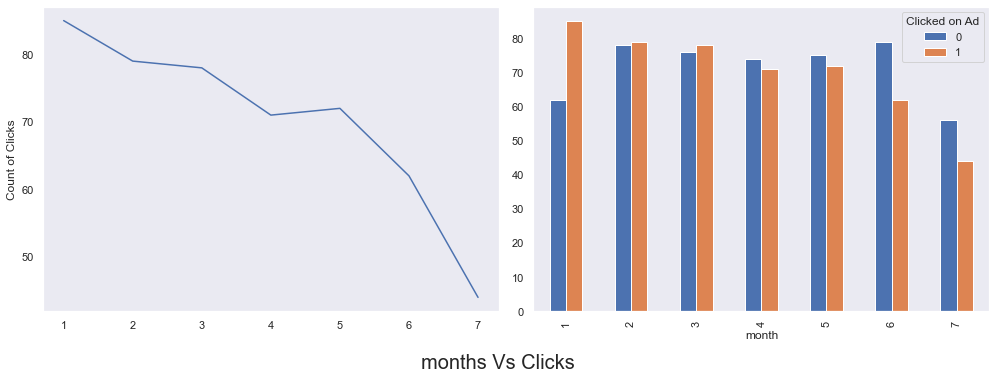

In [125]:
f,ax=plt.subplots(1,2,figsize=(14,5))
s['month'][s['Clicked on Ad']==1].value_counts().sort_index().plot(ax=ax[0])
ax[0].set_ylabel('Count of Clicks')
pd.crosstab(s["Clicked on Ad"], s["month"]).T.plot(kind = 'bar',ax=ax[1])
s.groupby(['month'])['Clicked on Ad'].sum() 
plt.tight_layout()
plt.suptitle('months Vs Clicks',y=0,size=20)
plt.show()

Here we see that on month 1 we see there is a huge hike in Clicking ads and huge hike in 6th month for no clicked on ads

## Categorical 'City' to numerical

In [126]:
s['City']= s['City'].astype('category').cat.codes

In [127]:
s

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
5                       59.99   23     59761.56                226.74   
6                       88.91   33     53852.85                208.36   
7                       66.00   48     24593.33                131.76   
8                       74.53   30     68862.00                221.51   
9                       69.88   20     55642.32                183.82   
10                      47.64   49     45632.51                122.02   
11                      83.07   37     62491.01                230.87   
12                      69.57   48     51636.92                113.12   
13                      79.52   24     51739.63                214.23   
14                      42.95   33     30976.00                143.56   
15                      63.45   23     52182.23                140.64   
16                      55.39   37     23936.86                129.41   
17                      82.03   41     71511.08                187.53   
18                      54.70   36     31087.54                118.39   
19                      74.58   40     23821.72                135.51   
20                      77.22   30     64802.33                224.44   
21                      84.59   35     60015.57                226.54   
22                      41.49   52     32635.70                164.83   
23                      87.29   36     61628.72                209.93   
24                      41.39   41     68962.32                167.22   
25                      78.74   28     64828.00                204.79   
26                      48.53   28     38067.08                134.14   
27                      51.95   52     58295.82                129.23   
28                      70.20   34     32708.94                119.20   
29                      76.02   22     46179.97                209.82   
30                      67.64   35     51473.28                267.01   
31                      86.41   28     45593.93                207.48   
32                      59.05   57     25583.29                169.23   
33                      55.60   23     30227.98                212.58   
34                      57.64   57     45580.92                133.81   
35                      84.37   30     61389.50                201.58   
36                      62.26   53     56770.79                125.45   
37                      65.82   39     76435.30                221.94   
38                      50.43   46     57425.87                119.32   
39                      38.93   39     27508.41                162.08   
40                      84.98   29     57691.95                202.61   
41                      64.24   30     59784.18                252.36   
42                      82.52   32     66572.39                198.11   
43                      81.38   31     64929.61                212.30   
44                      80.47   25     57519.64                204.86   
45                      37.68   52     53575.48                172.83   
46                      69.62   20     50983.75                202.25   
47                      85.40   43     67058.72                198.72   
48                      44.33   37     52723.34                123.72   
49                      48.01   46     54286.10                119.93   
50                      73.18   23     61526.25                196.71   
51                      79.94   28     58526.04                225.29   
52                      33.33   45     53350.11                193.58   
53                      50.33   50     62657.53                

## Categorical 'Country' to numerical

In [128]:
s['Country']= s['Country'].astype('category').cat.codes

In [129]:
s

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
5                       59.99   23     59761.56                226.74   
6                       88.91   33     53852.85                208.36   
7                       66.00   48     24593.33                131.76   
8                       74.53   30     68862.00                221.51   
9                       69.88   20     55642.32                183.82   
10                      47.64   49     45632.51                122.02   
11                      83.07   37     62491.01                230.87   
12                      69.57   48     51636.92                113.12   
13                      79.52   24     51739.63                214.23   
14                      42.95   33     30976.00                143.56   
15                      63.45   23     52182.23                140.64   
16                      55.39   37     23936.86                129.41   
17                      82.03   41     71511.08                187.53   
18                      54.70   36     31087.54                118.39   
19                      74.58   40     23821.72                135.51   
20                      77.22   30     64802.33                224.44   
21                      84.59   35     60015.57                226.54   
22                      41.49   52     32635.70                164.83   
23                      87.29   36     61628.72                209.93   
24                      41.39   41     68962.32                167.22   
25                      78.74   28     64828.00                204.79   
26                      48.53   28     38067.08                134.14   
27                      51.95   52     58295.82                129.23   
28                      70.20   34     32708.94                119.20   
29                      76.02   22     46179.97                209.82   
30                      67.64   35     51473.28                267.01   
31                      86.41   28     45593.93                207.48   
32                      59.05   57     25583.29                169.23   
33                      55.60   23     30227.98                212.58   
34                      57.64   57     45580.92                133.81   
35                      84.37   30     61389.50                201.58   
36                      62.26   53     56770.79                125.45   
37                      65.82   39     76435.30                221.94   
38                      50.43   46     57425.87                119.32   
39                      38.93   39     27508.41                162.08   
40                      84.98   29     57691.95                202.61   
41                      64.24   30     59784.18                252.36   
42                      82.52   32     66572.39                198.11   
43                      81.38   31     64929.61                212.30   
44                      80.47   25     57519.64                204.86   
45                      37.68   52     53575.48                172.83   
46                      69.62   20     50983.75                202.25   
47                      85.40   43     67058.72                198.72   
48                      44.33   37     52723.34                123.72   
49                      48.01   46     54286.10                119.93   
50                      73.18   23     61526.25                196.71   
51                      79.94   28     58526.04                225.29   
52                      33.33   45     53350.11                193.58   
53                      50.33   50     62657.53                

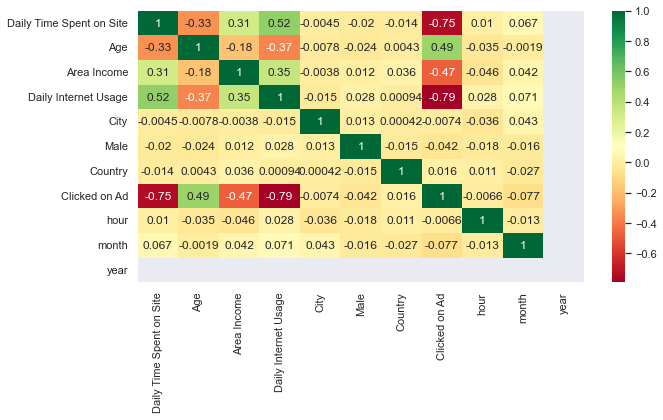

In [130]:
plt.figure(figsize=(10,5))
sns.heatmap(s.corr(), cmap='RdYlGn', annot=True)
plt.show()

### Based on the above Correlation plot , we have come to a conclusion that taking only the five most essential columns will provide us a better prediction.

# Model

## Splitting Dataset

In [131]:
X = s.drop(labels=['Ad Topic Line','Clicked on Ad','year','City','Male','hour','month'], axis=1)

In [132]:
Y = s['Clicked on Ad']

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss 
from sklearn.metrics import accuracy_score 

## 1) Logistic Regression

In [136]:
log_reg_model = LogisticRegression()

In [137]:
log_reg_model.fit(X_train, Y_train)

LogisticRegression()

In [138]:
log_reg_pred = log_reg_model.predict(X_test)

In [139]:
log_reg_accuracy = accuracy_score(log_reg_pred, Y_test)
print(log_reg_accuracy*100)

91.94630872483222


## 2) Naive Bayes Model

In [140]:
from sklearn.naive_bayes import GaussianNB

In [141]:
nav_bayes_model = GaussianNB()

In [142]:
nav_bayes_model.fit(X_train, Y_train)

GaussianNB()

In [143]:
nav_bayes_pred = nav_bayes_model.predict(X_test)

In [144]:
nav_bayes_accuracy = accuracy_score(nav_bayes_pred, Y_test)
print(nav_bayes_accuracy*100)

97.98657718120806


## 3) Decision Tree Model

In [145]:
from sklearn.tree import DecisionTreeClassifier

In [146]:
dec_tree_model = DecisionTreeClassifier()

In [147]:
dec_tree_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [148]:
dec_tree_pred = dec_tree_model.predict(X_test)

In [149]:
dec_tree_accuracy = accuracy_score(dec_tree_pred, Y_test)
print(dec_tree_accuracy*100);

94.96644295302013


## 4) Random Forest 

In [150]:
from sklearn.ensemble import RandomForestClassifier

In [151]:
rand_forest_model= RandomForestClassifier()

In [152]:
rand_forest_model.fit(X_train,Y_train)

RandomForestClassifier()

In [153]:
rand_forest_pred = rand_forest_model.predict(X_test)

In [154]:
rand_forest_accuracy = accuracy_score(rand_forest_pred, Y_test)
print(rand_forest_accuracy*100);

97.6510067114094


## 5) K-Nearest-Neighbours

In [155]:
from sklearn.neighbors import KNeighborsClassifier

In [156]:
knn_model=KNeighborsClassifier(n_neighbors=8)

In [157]:
knn_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=8)

In [158]:
knn_pred = knn_model.predict(X_test)

In [159]:
knn_accuracy = accuracy_score(knn_pred, Y_test)
print(knn_accuracy*100);

69.12751677852349
